## Modelo Random forest

In [21]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error



In [22]:
dataset = pd.read_csv("database_final2.csv")
dataset.head()

,Unnamed: 0,Director_Avg_Movie_Revenue,Keywords_Avg_Revenue,Studios_Avg_Movie_Revenue,Lead_Actor_Avg_Movie_Revenue,Budget,Class
0,0,3.140352e+08,2.186970e+08,3.100957e+08,3.383931e+08,105500000.0,1
1,1,3.140352e+08,2.186970e+08,3.100957e+08,2.664292e+08,105500000.0,1
2,2,3.140352e+08,2.186970e+08,3.100957e+08,2.726865e+08,105500000.0,1
3,3,3.140352e+08,1.840612e+08,2.561719e+08,2.935823e+08,105500000.0,1
4,4,3.140352e+08,2.186970e+08,3.100957e+08,3.383931e+08,105500000.0,1


In [23]:
#nuevo dataset con las variables de interés, ya que se ha generado una columna nueva al crearlo anteriormente
dataset = dataset [["Budget", "Director_Avg_Movie_Revenue", "Keywords_Avg_Revenue", "Studios_Avg_Movie_Revenue", "Lead_Actor_Avg_Movie_Revenue", "Class"]]

In [24]:
X = dataset.drop(["Class"],axis = 1)
y = dataset["Class"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
#escalamos los datos

min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [27]:
# Para volver a leer el modelo
import pickle

with open('finished_model.model', "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)
    
print(pipeline_importada)

RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=120)


Utilizamos los parámetros seleccionados por Gridsearch como los mejores para mis datos

In [28]:
clf = RandomForestClassifier(bootstrap=True, criterion='gini',
            max_depth=3, max_features="sqrt", max_leaf_nodes=None,n_estimators=120)

In [29]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=120)

In [30]:
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.62      0.73       435
           1       0.77      0.95      0.85       592

    accuracy                           0.81      1027
   macro avg       0.84      0.79      0.79      1027
weighted avg       0.83      0.81      0.80      1027



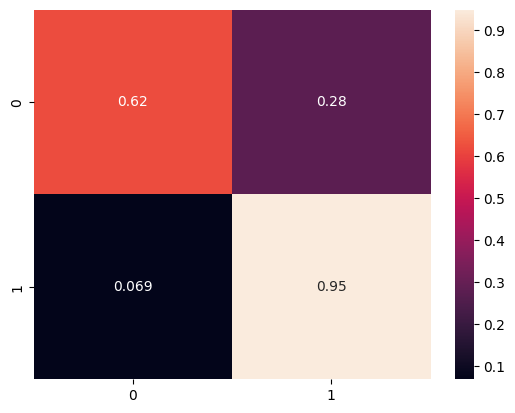

In [31]:
print(classification_report(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
c_mat

import seaborn as sns

sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);


El modelo es muy bueno prediciendo qué películas no van a ser rentables (un 95% de aciertos), pero solo es capaz de predecir al 63% qué películas sí van a ser rentables. Por esta razón, seguimos probando con diferentes parámetros para intentar calibrar la matriz de confusión.

El modelo mejora con un hiperparámetro 10 en la profundidad del árbol

In [32]:
clf_2 = RandomForestClassifier(bootstrap=True, criterion='gini',
            max_depth=10, max_features="sqrt", max_leaf_nodes=None,n_estimators=120)

In [33]:
clf_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=120)

In [34]:
y_pred_2 = clf_2.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       435
           1       0.88      0.92      0.90       592

    accuracy                           0.88      1027
   macro avg       0.88      0.87      0.88      1027
weighted avg       0.88      0.88      0.88      1027



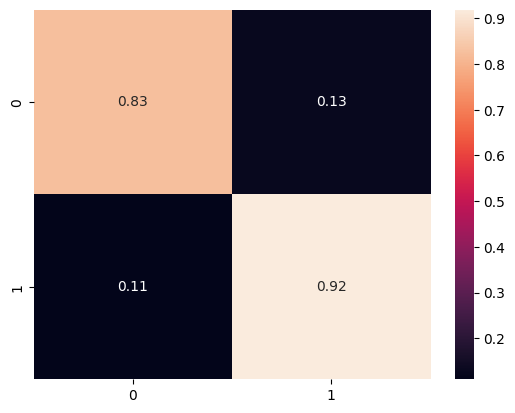

In [35]:
print(classification_report(y_test, y_pred_2))
c_mat_2 = confusion_matrix(y_test,y_pred_2)
c_mat_2

sns.heatmap(c_mat_2/c_mat_2.sum(axis=1), annot=True);


El modelo tiene un accuracy del 88%, una métrica mejor que la anterior.

Ahora sí, la predicción está más equilibrada y no se ha perdido a penas predicción en los true negatives. Por tanto, este modelo es bueno al 83% prediciendo las películas que van a ser rentables (True positives) y a un 92% las películas que no van a ser rentables (true negatives).

Un 13% de las veces predecirá una película rentable cuando en realidad no lo será, mientras que un 11% de las veces predecirá una película no rentable cuando en realidad sí lo será.